
## Data analysis and visualization of knowledge graph for star war movies

👉👉[**You can have a look at this Project first**](http://starwar-visualization.s3-website-us-west-1.amazonaws.com) 👈👈


This project collected data from online database [**SWAPI**](https://swapi.co), which is the world's first quantified and programmatically-accessible data source for all the data from the Star Wars canon universe!

The dataset include 6 APIs: Planets, Spaceships, Vehicles, People, Films and Species, from all SEVEN Star Wars films.

### 1. Data collection

We can get the json file of all data from this website, then use urllib in python3 to download and save data. 


In [1]:
import warnings
warnings.simplefilter('ignore')

import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [5]:
films = []
for x in range(1,8):
    films.append('httP://swapi.co/api/films/' + str(x) + '/')

headers = {}
headers["User-Agent"] = "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.104 Safari/537.36 Core/1.53.3226.400 QQBrowser/9.6.11681.400"

fw = open('../csv/films.txt', 'w')
for item in films:
    print(item)
    request = urllib.request.Request(item, headers=headers)
    response = urllib.request.urlopen(request, timeout=20)
    result = response.read().decode('utf-8')
    print(result)
    fw.write(result + '\n')

fw.close()

httP://swapi.co/api/films/1/
{"title":"A New Hope","episode_id":4,"opening_crawl":"It is a period of civil war.\r\nRebel spaceships, striking\r\nfrom a hidden base, have won\r\ntheir first victory against\r\nthe evil Galactic Empire.\r\n\r\nDuring the battle, Rebel\r\nspies managed to steal secret\r\nplans to the Empire's\r\nultimate weapon, the DEATH\r\nSTAR, an armored space\r\nstation with enough power\r\nto destroy an entire planet.\r\n\r\nPursued by the Empire's\r\nsinister agents, Princess\r\nLeia races home aboard her\r\nstarship, custodian of the\r\nstolen plans that can save her\r\npeople and restore\r\nfreedom to the galaxy....","director":"George Lucas","producer":"Gary Kurtz, Rick McCallum","release_date":"1977-05-25","characters":["https://swapi.co/api/people/1/","https://swapi.co/api/people/2/","https://swapi.co/api/people/3/","https://swapi.co/api/people/4/","https://swapi.co/api/people/5/","https://swapi.co/api/people/6/","https://swapi.co/api/people/7/","https://swapi.

{"title":"Attack of the Clones","episode_id":2,"opening_crawl":"There is unrest in the Galactic\r\nSenate. Several thousand solar\r\nsystems have declared their\r\nintentions to leave the Republic.\r\n\r\nThis separatist movement,\r\nunder the leadership of the\r\nmysterious Count Dooku, has\r\nmade it difficult for the limited\r\nnumber of Jedi Knights to maintain \r\npeace and order in the galaxy.\r\n\r\nSenator Amidala, the former\r\nQueen of Naboo, is returning\r\nto the Galactic Senate to vote\r\non the critical issue of creating\r\nan ARMY OF THE REPUBLIC\r\nto assist the overwhelmed\r\nJedi....","director":"George Lucas","producer":"Rick McCallum","release_date":"2002-05-16","characters":["https://swapi.co/api/people/2/","https://swapi.co/api/people/3/","https://swapi.co/api/people/6/","https://swapi.co/api/people/7/","https://swapi.co/api/people/10/","https://swapi.co/api/people/11/","https://swapi.co/api/people/20/","https://swapi.co/api/people/21/","https://swapi.co/api/peopl

In [9]:
fr = open('../csv/films.txt', 'r')
films = []
for line in fr:
    line = json.loads(line.strip('\n'))
    films.append(line)
fr.close()

# 获取 characters,planets,starships,vehicles,species
targets = ['characters', 'planets', 'starships', 'vehicles', 'species']
for target in targets:
    fw = open('../csv/' + target + '.txt', 'w')
    data = []
    for item in films:
        tmp = item[target]
        for t in tmp:
            if t in data:
                continue
            else:
                data.append(t)
                
            while 1:
                print(t)
                try:
                    request = urllib.request.Request(t, headers=headers)
                    response = urllib.request.urlopen(request, timeout=20)
                    result = response.read().decode('utf-8')
                except Exception as e:
                    continue
                else:
                    fw.write(result + '\n')
                    break
                finally:
                    pass

    print (str(len(data)), target)
    fw.close()

https://swapi.co/api/people/1/
https://swapi.co/api/people/2/
https://swapi.co/api/people/3/
https://swapi.co/api/people/4/
https://swapi.co/api/people/5/
https://swapi.co/api/people/6/
https://swapi.co/api/people/7/
https://swapi.co/api/people/8/
https://swapi.co/api/people/9/
https://swapi.co/api/people/10/
https://swapi.co/api/people/12/
https://swapi.co/api/people/13/
https://swapi.co/api/people/14/
https://swapi.co/api/people/15/
https://swapi.co/api/people/16/
https://swapi.co/api/people/18/
https://swapi.co/api/people/19/
https://swapi.co/api/people/81/
https://swapi.co/api/people/20/
https://swapi.co/api/people/21/
https://swapi.co/api/people/22/
https://swapi.co/api/people/23/
https://swapi.co/api/people/24/
https://swapi.co/api/people/25/
https://swapi.co/api/people/26/
https://swapi.co/api/people/27/
https://swapi.co/api/people/28/
https://swapi.co/api/people/29/
https://swapi.co/api/people/30/
https://swapi.co/api/people/31/
https://swapi.co/api/people/45/
https://swapi.co/

### 2. Basic analysis

In [42]:
fr = open('../csv/films.txt','r')
fw = open('../csv/stat_basic.csv','w')
fw.write('title,key,value\n')

for line in fr:
    tmp = json.loads(line.strip('\n'))
    fw.write(tmp['title'] + ',' + 'characters,' + str(len(tmp['characters'])) + '\n')
    fw.write(tmp['title'] + ',' + 'planets,' + str(len(tmp['planets'])) + '\n')
    fw.write(tmp['title'] + ',' + 'starships,' + str(len(tmp['starships'])) + '\n')
    fw.write(tmp['title'] + ',' + 'vehicles,' + str(len(tmp['vehicles'])) + '\n')
    fw.write(tmp['title'] + ',' + 'species,' + str(len(tmp['species'])) + '\n')

fr.close()
fw.close()


In [44]:
stats = pd.read_csv('../csv/stat_basic.csv')
stats.head()

title         key  value
0  A New Hope  characters     18
1  A New Hope     planets      3
2  A New Hope   starships      8
3  A New Hope    vehicles      4
4  A New Hope     species      5

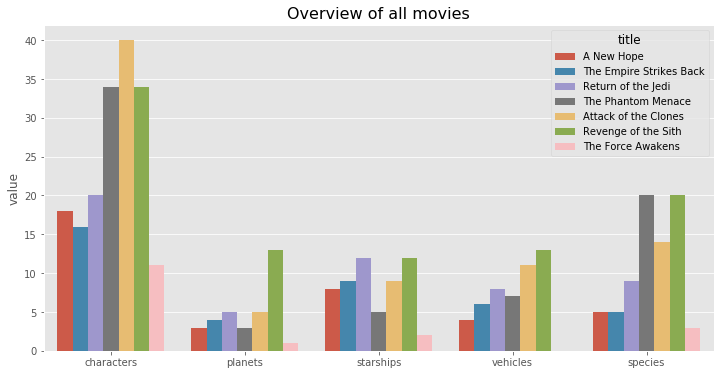

In [49]:
# Visualization of overall stats

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='key', y ='value', hue='title', data=stats)
ax.set_title('Overview of all movies', fontsize=16)
plt.xlabel('')
plt.show()

#### "Attack of the Clones" has most characters 

In [50]:
fr = open('../csv/characters.txt','r')
fw = open('../csv/stat_characters.csv','w')
fw.write('name,height,mass,gender,homeworld\n')
for line in fr:
    tmp = json.loads(line.strip('\n'))
    if tmp['height'] == 'unknown':
        tmp['height'] = '-1'
    if tmp['mass'] == 'unknown':
        tmp['mass'] = '-1'
    if tmp['gender'] == 'none':
        tmp['gender'] = 'n/a'
    fw.write(tmp['name'] + ',' + tmp['height'] + ',' + tmp['mass'] + ',' + tmp['gender'].strip() + ',' + tmp['homeworld'] + '\n')

fr.close()
fw.close()


In [55]:
stat_characters = pd.read_csv('../csv/stat_characters.csv')
stat_characters.head()

name  height   mass  gender                        homeworld
0  Luke Skywalker     172   77.0    male  https://swapi.co/api/planets/1/
1           C-3PO     167   75.0     NaN  https://swapi.co/api/planets/1/
2           R2-D2      96   32.0     NaN  https://swapi.co/api/planets/8/
3     Darth Vader     202  136.0    male  https://swapi.co/api/planets/1/
4     Leia Organa     150   49.0  female  https://swapi.co/api/planets/2/

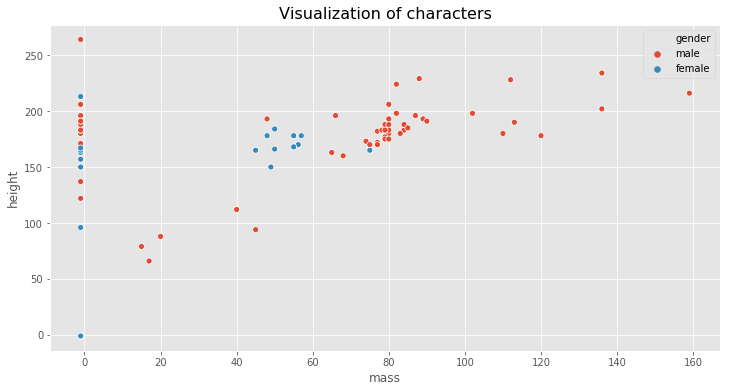

In [57]:
# Visualization of characters

fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='mass', y ='height', hue='gender', data=stat_characters)
ax.set_title('Visualization of characters', fontsize=16)
plt.show()

### 3. Build relationship data file

Now we use python to create 3 json files to build our interactive graph, we will use **html、css、javascript and d3 to finish** it.

You can open the `index.html` in this directory, the website is based on it.

### 4. Visualization

The core is D3, **Data Driven Documents**, which is data-driven documents. It is one of the most popular JS visualization libraries. The core idea of D3 is to use data to generate elements on a web page. When data is updated, the appearance and attributes of elements on a web page are modified according to the changes of data.

We need to prepare an `SVG` and `G` as drawing containers in HTML code, then `select ()` the containers in JS code, then `select all ()` the `SVG` elements to be generated, bind data for `SVG` elements using `data (), execute enter (). append ()` and `exit (). remove ()` according to the corresponding state of data and elements, and control `SVG` using `attr ()` to control svg.  Element appearance, and dynamically update the appearance of SVG elements according to user interaction

In order to achieve this graph, we generate circle and text elements based on node data; line elements based on node links; circle and text size and color are controlled according to node data; and when the mouse is hovering and dragging, the corresponding time is triggered, and the appearance and display of elements are changed. The implementation of the timeline is similar. The only difference is that rect element is used here.
